In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression # Regressão Logistica / Algoritmo classificador muito simples
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
# a biblioteca que contém o smote e o nearmiss (é uma extensão da SKlearn) é a 'imblearn'
import seaborn as sns

In [2]:
df = pd.read_csv('/home/amador/dados/bank-full.csv', sep=';')

In [3]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# bastante desbalanceada
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
# formatando algumas colunas
df["default"] = df["default"].map({"no":0,"yes":1})
df["housing"] = df["housing"].map({"no":0,"yes":1})
df["loan"] = df["loan"].map({"no":0,"yes":1})
df["y"] = df["y"].map({"no":0,"yes":1})
df.education = df.education.map({"primary": 0, "secondary":1, "tertiary":2})
df.poutcome = df.poutcome.map({"unknown": 0, "failure":1, "other":2, "success":3})
df.contact = df.contact.map({"cellular": 0, "unknown":1, "telephone":2})
df.month = pd.to_datetime(df.month, format = "%b").dt.month

In [7]:
# checando valores faltantes
df.isnull().sum()

age             0
job             0
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

In [8]:
# removendo missing values
df.dropna(inplace = True)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2.0,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,technician,single,1.0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,entrepreneur,married,1.0,0,2,1,1,1,5,5,76,1,-1,0,0,0


In [9]:
# transformando colunas categóricas em numéricas
df = pd.get_dummies(df)
df.head(3)

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# distribuição das classes
df.y.value_counts()

0    38317
1     5037
Name: y, dtype: int64

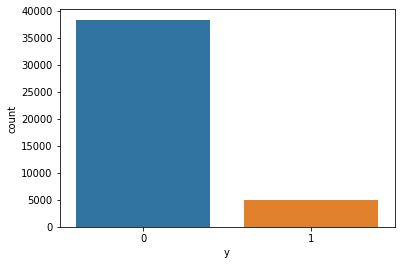

In [11]:
import seaborn as sns
ax = sns.countplot(x="y", data=df)

In [12]:
# instanciando um classificador
lr = LogisticRegression()

In [13]:
# separando features e classes
X = df.drop("y", axis = 1)
y = df.y

In [14]:
# separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [15]:
# treinando o algoritmo
lr.fit(X_train, y_train)

/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
# predizendo resultados de teste
y_pred = lr.predict(X_test)

In [17]:
# checando a acurárica
accuracy_score(y_test, y_pred)

0.8931635759756436

In [18]:
# relatório de classificação
# observação no recall
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9580
           1       0.61      0.22      0.33      1259

    accuracy                           0.89     10839
   macro avg       0.76      0.60      0.63     10839
weighted avg       0.87      0.89      0.87     10839



In [19]:
# matriz de confusão
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0         9399  181   9580
1          977  282   1259
All      10376  463  10839


## NearMiss

In [20]:
from imblearn.under_sampling import NearMiss
# instanciando
nr = NearMiss()

In [21]:
# aplicando o nearmiss
X, y = nr.fit_sample(X, y)

In [22]:
# checando a quantidade
y.value_counts()

1    5037
0    5037
Name: y, dtype: int64

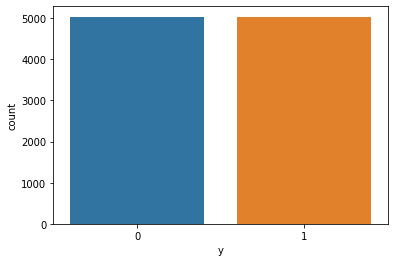

In [23]:
# checando a quantidade graficamente
ax = sns.countplot(x=y)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10074 entries, 0 to 10073
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10074 non-null  int64  
 1   education          10074 non-null  float64
 2   default            10074 non-null  int64  
 3   balance            10074 non-null  int64  
 4   housing            10074 non-null  int64  
 5   loan               10074 non-null  int64  
 6   contact            10074 non-null  int64  
 7   day                10074 non-null  int64  
 8   month              10074 non-null  int64  
 9   duration           10074 non-null  int64  
 10  campaign           10074 non-null  int64  
 11  pdays              10074 non-null  int64  
 12  previous           10074 non-null  int64  
 13  poutcome           10074 non-null  int64  
 14  job_admin.         10074 non-null  uint8  
 15  job_blue-collar    10074 non-null  uint8  
 16  job_entrepreneur   100

In [25]:
# dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [26]:
# instanciando o classificador
lr = LogisticRegression()
# treinando o algoritmo
lr.fit(X_train, y_train)

/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
# predizendo resultados de teste
y_pred = lr.predict(X_test)

In [28]:
# checando a acurácia
accuracy_score(y_test, y_pred)

0.8717745136959111

In [29]:
# métricas
# atenção no recall
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1259
           1       0.89      0.85      0.87      1260

    accuracy                           0.87      2519
   macro avg       0.87      0.87      0.87      2519
weighted avg       0.87      0.87      0.87      2519



In [30]:
# matriz de confusão
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1128   131  1259
1         192  1068  1260
All      1320  1199  2519


## SMOTE (Synthetic Minority Over-sampling Technique)¶

In [31]:
# separando os dados
X = df.drop("y", axis = 1)
y = df.y

In [32]:
# visualizando os dados por classe
np.bincount(y)

array([38317,  5037])

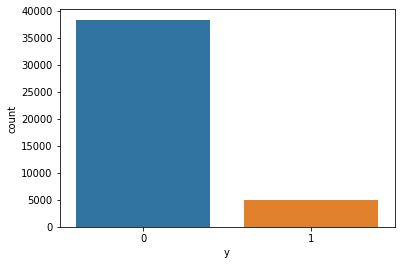

In [33]:
# visualizando graficamente
ax = sns.countplot(x=y)

In [34]:
#  instanciando com sampling_strategy=0.5. 0.5 aumenta em 50% da minoritária em relação à classe majoritária
# sem esse parâmetro ele deixa igualitário
smt = SMOTE(sampling_strategy=0.5)

In [35]:
# aplicando o SMOTE nos dados
X, y = smt.fit_sample(X, y)

In [36]:
# nova distribuição
np.bincount(y)

array([38317, 19158])

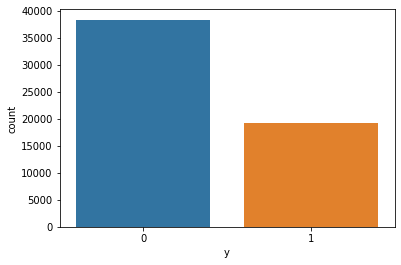

In [37]:
# graficamente
ax = sns.countplot(x=y)

In [38]:
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [39]:
# instanciando o classificador
lr = LogisticRegression()
# treinando o algoritmo
lr.fit(X_train, y_train)

/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [40]:
# predizendo com os valores de teste
y_pred = lr.predict(X_test)

In [41]:
# checando a acurácia
accuracy_score(y_test, y_pred)

0.8459182963323822

In [42]:
# métricas
# atenção no recall
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      9579
           1       0.81      0.70      0.75      4790

    accuracy                           0.85     14369
   macro avg       0.83      0.81      0.82     14369
weighted avg       0.84      0.85      0.84     14369



In [43]:
# matriz de confusão
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0     1    All
Real                       
0         8780   799   9579
1         1415  3375   4790
All      10195  4174  14369
